# Case Study: Hacker Statistics

## Random Numbers

**Imagine the following:** you're walking up the Empire State Building and you're playing a game with a friend.
* You throw a die one hundred times.
 * If it's 1 or 2 you'll go one step down.
 * If it's 3, 4, or 5, you'll go one step up.
 * If you throw a 6, you'll throw the die again and will walk up the resulting number of steps.
* Of course, it's not possible to go lower than step number 0. There's also a 0.1% chance of falling down the stairs when you make a move. Falling down means that you have to start again from step 0. 
<br><br>
* With all of this in mind, you bet with your friend that you'll reach 60 steps high.
* What is the chance you will win this bet?

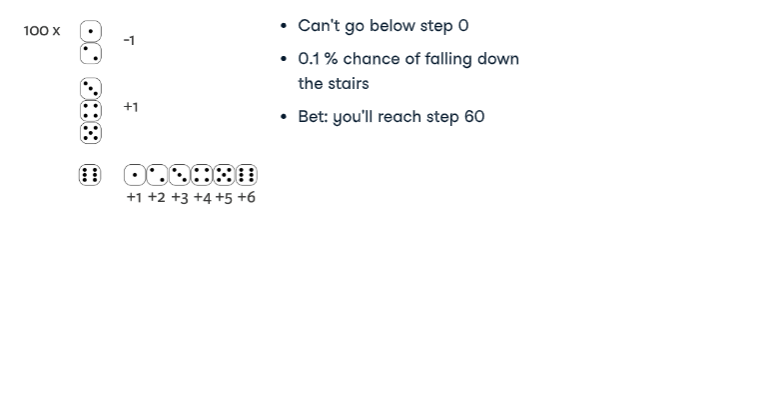

### How to solve?

One way to solve it is to simulate this process thousands of times, and see in what fraction of the simulations that you will reach 60 steps.

### Random generators

We will need random generators, so we can simulate the die.

In [1]:
import numpy as np
np.random.rand()  # generate a random number between zero and one

0.21699180479686286

Computers generate pseudo-random numbers using a mathematical formula, starting from a random seed. This seed is set by Python when we call the `rand` function, but the seed can also be set manually.

In [2]:
np.random.seed(123)  # starting from a seed
np.random.rand()

0.6964691855978616

In [3]:
np.random.rand()

0.28613933495037946

If we set the seed back to 123, and call `rand` twice more, we get the exact same random numbers. That's why it's called pseudo-random; it's random but consistent between runs; this is very useful, because this ensures "reproducibility", i.e. other people can reproduce your analysis.

In [4]:
np.random.seed(123)
np.random.rand()

0.6964691855978616

In [5]:
np.random.rand()

0.28613933495037946

### Coin toss

In [10]:
# to simulate a coin toss
import numpy as np
np.random.seed(123)
coin = np.random.randint(0, 2)  # randomly generate 0 or 1
if coin == 0:
    print("heads")
else:
    print("tails")

heads


#### Determine your next move

Assume that you are currently at step 50, your next move depends on the number of eyes you throw with the dice.

In [11]:
import numpy as np
np.random.seed(123)

# starting step
step = 50

# roll the dice
dice = np.random.randint(1, 7)  # generate random integers from 1 through 6

# control construct
if dice <= 2:
    step = step - 1
elif dice <= 5:
    step = step + 1
else:
    step = step + np.random.randint(1, 7)

# check if the code was executed correctly
print(dice, step)

6 53


## Random Walk

If you use a dice to determine your next step, you can call this a random step. If you use a dice 100 times to determine your next step, you would have a succession of random steps, or in other words, a random walk.

#### Heads or Tails: Random Walk

In [12]:
import numpy as np
np.random.seed(123)

tails = [0]  # list contains zero because at the start we haven't thrown any tails
for x in range(10):
    coin = np.random.randint(0, 2)
    tails.append(tails[x] + coin)  # add coin to the previous number of tails, and append this count to the list
    
print(tails)  # the final element in this list is the number of tails thrown

[0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3]


Write code that calculates your location in the Empire State Building after 100 dice throws. Visualize the random walk.

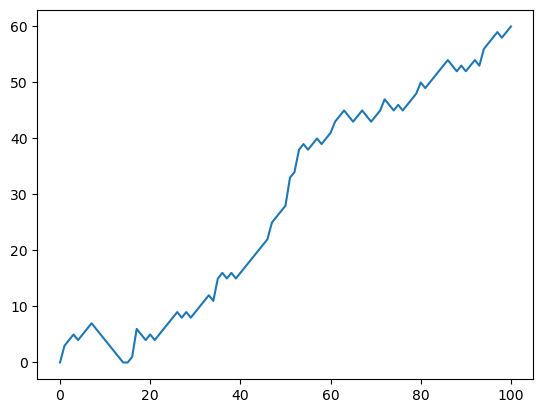

In [16]:
import numpy as np
np.random.seed(123)

# initialize random_walk
random_walk = [0]

# the for loop should run 100 times
for x in range(100):
    step = random_walk[-1]  # set step to the last element in random_walk
    
    # roll the dice
    dice = np.random.randint(1, 7)
    
    # determine next step
    if dice <= 2:
        step = max(0, step - 1)  # use max to make sure step can't go below 0
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1, 7)
    
    # append next step to random_walk
    random_walk.append(step)
    
# visualize random_walk
import matplotlib.pyplot as plt

plt.plot(random_walk)
plt.show()

## Distribution

Each random walk will end up on a different step. If you simulate this walk thousands of times, you will end up with thousands of final steps. This is actually a distribution of final steps. And once you know the distribution, you can start calculating chances.

In [9]:
import numpy as np
np.random.seed(123)

final_tails = []

for x in range(10):  # number of times the game of tossing a coin 10 times is simulated
    tails = [0]  
    for x in range(10):  # game of tossing a coin 10 times
        coin = np.random.randint(0, 2)
        tails.append(tails[x] + coin)  # each coin toss is added to the previous coin toss; 
                                       # the last item in the list is the number of tails
    print(tails)
    final_tails.append(tails[-1])  # append the last item in the list "tails" to "final_tails"

print(final_tails)

[0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3]
[0, 1, 2, 2, 3, 3, 4, 4, 5, 6, 6]
[0, 0, 0, 1, 2, 3, 3, 4, 4, 4, 4]
[0, 0, 1, 2, 3, 3, 3, 4, 4, 4, 5]
[0, 0, 1, 1, 2, 3, 4, 4, 4, 4, 4]
[0, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5]
[0, 0, 1, 1, 2, 2, 2, 2, 2, 3, 3]
[0, 0, 1, 2, 3, 4, 4, 4, 4, 4, 5]
[0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4]
[0, 1, 2, 3, 3, 4, 5, 6, 6, 6, 6]
[3, 6, 4, 5, 4, 5, 3, 5, 4, 6]


#### Simulate multiple walks

To get an idea about how big your chances are of reaching 60 steps, you can repeatedly simulate the random walk and collect the results.

In [22]:
import numpy as np
np.random.seed(123)

# initialize all_walks
all_walks = []

# simulate random_walk 10 times
for i in range(500):
    
    random_walk = [0]
    for x in range(100):
        step = random_walk[-1]
        dice = np.random.randint(1, 7)
        
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1, 7)
        
        # implement clumsiness (0.1% chance of falling down; step will be reset to 0)
        if np.random.rand() <= 0.001:
            step = 0
            
        random_walk.append(step)
        
    # append random_walk to all_walks
    all_walks.append(random_walk)

`all_walks` is a list of lists: every sub-list represents a single random walk. Convert this list of lists to a NumPy array to visualize `all_walks`.

In [23]:
import matplotlib.pyplot as plt

# convert all_walks to a NumPy array: np_aw
np_aw = np.array(all_walks)

# transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)  # now every row in np_aw_t represents the position after 1 throw for the 500 random walks

Select the last row from `np_aw_t`. This contains the endpoint of all 500 random walks you've simulated.

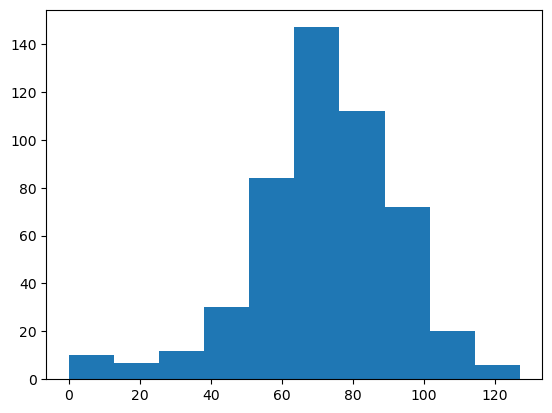

In [24]:
# select the last row from np_aw_t: ends
ends = np_aw_t[-1, :]

# plot histogram of ends, display plot
plt.hist(ends)
plt.show()

#### Calculate the odds

Then NumPy array `ends`, contains 500 integers. Each integer represents the end point of a random walk. Calculate the chance that this end point is greater than or equal to 60.

In [29]:
count = np.sum(ends >= 60)
print("The number of integers greater than or equal to 60: " + str(count))

The number of integers greater than or equal to 60: 392


In [33]:
# calculate the chance
chance = (count / 500) * 100
print("The chance of reaching at least 60 steps high is: " + str(chance) + "%")

The chance of reaching at least 60 steps high is: 78.4%
